In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score, GridSearchCV
from sklearn import linear_model, tree, ensemble
#For training without cross_validation
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [3]:
df = pd.read_csv('../data/filled.csv')
df.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0000,39025.000000,HomeImp,Other,10.500000,0.0,0.0,94.366667,1.000000,9.000000,33.779915
1,1,1300,70053.0000,68400.000000,HomeImp,Other,7.000000,0.0,2.0,121.833333,0.000000,14.000000,33.779915
2,1,1500,13500.0000,16700.000000,HomeImp,Other,4.000000,0.0,0.0,149.466667,1.000000,10.000000,33.779915
3,1,1500,73760.8172,101776.048741,DebtCon,Other,8.922268,0.0,0.0,179.766275,1.186055,21.296096,33.779915
4,0,1700,97800.0000,112000.000000,HomeImp,Office,3.000000,0.0,0.0,93.333333,0.000000,14.000000,33.779915


In [4]:
cat_columns = ['REASON', 'JOB']


def create_dummy(dataframe, cat_vars):
    for var in cat_vars:
        cat_list = 'var' + '_' + 'var'
        cat_list = pd.get_dummies(dataframe[var], prefix=var)
        dataframe_new = dataframe.join(cat_list)
        dataframe = dataframe_new
    data_vars = dataframe.columns.values.tolist()
    to_keep = [i for i in data_vars if i not in cat_vars]

    dataframe_final = dataframe[to_keep]

    return dataframe_final


data_to_model = create_dummy(df, cat_columns)

In [5]:
data_to_model.head()

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,REASON_DebtCon,REASON_HomeImp,JOB_Mgr,JOB_Office,JOB_Other,JOB_ProfExe,JOB_Sales,JOB_Self
0,1,1100,25860.0000,39025.000000,10.500000,0.0,0.0,94.366667,1.000000,9.000000,33.779915,0,1,0,0,1,0,0,0
1,1,1300,70053.0000,68400.000000,7.000000,0.0,2.0,121.833333,0.000000,14.000000,33.779915,0,1,0,0,1,0,0,0
2,1,1500,13500.0000,16700.000000,4.000000,0.0,0.0,149.466667,1.000000,10.000000,33.779915,0,1,0,0,1,0,0,0
3,1,1500,73760.8172,101776.048741,8.922268,0.0,0.0,179.766275,1.186055,21.296096,33.779915,1,0,0,0,1,0,0,0
4,0,1700,97800.0000,112000.000000,3.000000,0.0,0.0,93.333333,0.000000,14.000000,33.779915,0,1,0,1,0,0,0,0


In [6]:
X = data_to_model.drop(columns="BAD")
y = data_to_model.BAD
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [7]:
from sklearn.neural_network import MLPClassifier

In [ ]:
hlayer_sizes = [144, 720, 2016]
learning_rates = [1e-2, 1e-3, 1e-4]

for hs, lr in hlayer_sizes, learning_rates:
    mlp = MLPClassifier(activation='relu',
                        hidden_layer_sizes=(hs,),
                        learning_rate='constant',
                        learning_rate_init=lr
                        )
    mlp.fit(X_train,y_train)
    y_pred = mlp.predict(X_test)
    from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

    print("Accuracy score : ", accuracy_score(y_test, y_pred))
    print("F1 score : ", f1_score(y_test, y_pred))
    print("Precision score : ", precision_score(y_test, y_pred))
    print("Recall score : ", recall_score(y_test, y_pred))

In [ ]:
# mlp.fit(X_train,y_train)

In [ ]:
# y_pred = mlp.predict(X_test)
# y_pred

In [13]:
# from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
#
# print("Accuracy score : ", accuracy_score(y_test, y_pred))
# print("F1 score : ", f1_score(y_test, y_pred))
# print("Precision score : ", precision_score(y_test, y_pred))
# print("Recall score : ", recall_score(y_test, y_pred))

Accuracy score :  0.8008948545861297
F1 score :  0.06806282722513089
Precision score :  0.34210526315789475
Recall score :  0.0377906976744186


In [1]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from preprocessing.create_dummy import create_dummy
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score

df = pd.read_csv('../data/filled.csv')
data_to_model = create_dummy(df)
X = data_to_model.drop(columns="BAD")

for col in X.columns:
    min_ = X[col].min()
    max_ = X[col].max()
    X[col] -= min_
    X[col] /= max_


y = data_to_model["BAD"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

parameters = {'max_iter': [1000, 1500, 2000],
              'alpha': [0.1, 0.01, 0.001, 0],
              'hidden_layer_sizes' : [[256,], [256, 256, 256,], [256, 256, 256, 256, 256,]],
              'learning_rate' : ['constant'],
              'learning_rate_init' : [1e-2, 1e-3, 1e-4],
              'activation': ['relu']
              }
clf = GridSearchCV(MLPClassifier(), parameters, n_jobs=-1)

clf.fit(X_train, y_train)
print(clf.score(X_train, y_train))
print(clf.best_params_)
y_pred = clf.predict(X_test)


print("Accuracy score : ", accuracy_score(y_test, y_pred))
print("F1 score : ", f1_score(y_test, y_pred))
print("Precision score : ", precision_score(y_test, y_pred))
print("Recall score : ", recall_score(y_test, y_pred))

0.9745925215723873
{'activation': 'relu', 'alpha': 0, 'hidden_layer_sizes': [256, 256, 256], 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_iter': 2000}
Accuracy score :  0.9233780760626398
F1 score :  0.80998613037448
Precision score :  0.8021978021978022
Recall score :  0.8179271708683473


In [2]:
import pickle
filename = 'mlp_model.sav'
pickle.dump(clf, open(filename, 'wb'))

In [3]:
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)
print(result)

0.9233780760626398


In [4]:
from sklearn.metrics import roc_auc_score
print('ROC-AUC: ', roc_auc_score(y_test, y_pred))

ROC-AUC:  0.8838063527297711


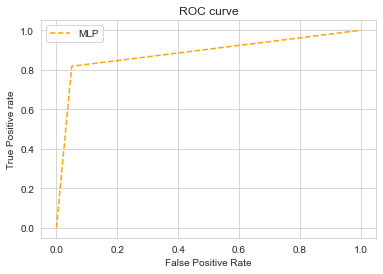

MLP ROC-AUC: 0.88381


In [9]:
from sklearn.metrics import roc_curve, precision_recall_curve
import matplotlib.pyplot as plt
# roc curve
fpr1, tpr1, _ = roc_curve(y_test, y_pred, pos_label=1)
plt.plot(fpr1, tpr1, linestyle='--', color='orange', label='MLP')

# pr curve
precision1, recall1, _ = precision_recall_curve(y_test, y_pred, pos_label=1)
# строим ROC кривые и вычисляем AUC-ROC




plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.show()
print('MLP ROC-AUC: %.5f' % roc_auc_score(y_test, y_pred))

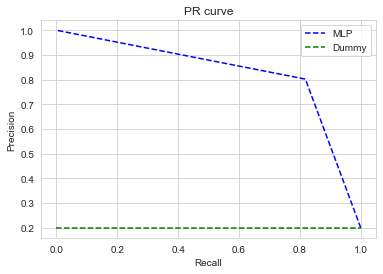

MLP PR-AUC: 0.82824
Dummy PR-AUC: 0.19966


In [7]:
from sklearn.metrics import auc
precision_lr, recall_lr, _ = precision_recall_curve(y_test, y_pred, pos_label=1)
plt.plot(recall_lr, precision_lr, linestyle='--',color='blue', label='MLP')
dumb = len(y_test[y_test==1]) / len(y_test)
plt.plot([0, 1], [dumb, dumb], linestyle='--',color='green', label='Dummy')

plt.title('PR curve')
plt.xlabel('Recall')
plt.ylabel('Precision')

plt.legend(loc='best')
plt.show()
print('MLP PR-AUC: %.5f' % auc(recall_lr, precision_lr))
print('Dummy PR-AUC: %.5f' % auc([0, 1], [dumb, dumb]))